In [1]:
import pandas as pd
import glob
# import plotly.plotly as py
import plotly.graph_objs as go

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) 

import numpy as np
import matplotlib.pyplot as plt
# include if using a Jupyter notebook
# %matplotlib inline

li=[]

for filename in ["exp2-baseline-dgemm.csv"]:
    df = pd.read_csv(filename,sep=',' , index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

pd.set_option('display.max_columns', None)
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance
0,hpccdgemm,0,16,4,4,2022-03-30T12:43:54Z,2022-03-30T12:44:00Z,2022-03-30T12:47:31Z,2022-03-30T12:47:32Z,4m12.152786469s,32.8329
1,hpccdgemm,1,16,4,4,2022-03-30T12:44:54Z,2022-03-30T12:45:00Z,2022-03-30T12:48:30Z,2022-03-30T12:48:30Z,4m8.900490008s,29.7737
2,hpccdgemm,2,16,4,4,2022-03-30T12:45:54Z,2022-03-30T12:45:59Z,2022-03-30T12:49:34Z,2022-03-30T12:49:34Z,4m22.147506835s,31.8622
3,hpccdgemm,3,16,4,4,2022-03-30T12:46:54Z,2022-03-30T12:47:00Z,2022-03-30T12:50:37Z,2022-03-30T12:50:37Z,4m22.148127306s,31.2756
4,hpccdgemm,4,16,4,4,2022-03-30T12:47:55Z,2022-03-30T12:48:00Z,2022-03-30T12:51:25Z,2022-03-30T12:51:25Z,4m11.142247147s,36.6319
5,hpccdgemm,5,16,4,4,2022-03-30T12:48:55Z,2022-03-30T12:48:59Z,2022-03-30T12:52:37Z,2022-03-30T12:52:37Z,4m21.147015356s,31.2375
6,hpccdgemm,6,16,4,4,2022-03-30T12:49:55Z,2022-03-30T12:50:00Z,2022-03-30T12:53:36Z,2022-03-30T12:53:37Z,4m21.111586633s,31.0654
7,hpccdgemm,7,16,4,4,2022-03-30T12:50:55Z,2022-03-30T12:51:00Z,2022-03-30T12:54:37Z,2022-03-30T12:54:38Z,4m21.14647605s,30.6373
8,hpccdgemm,8,16,4,4,2022-03-30T12:51:55Z,2022-03-30T12:52:00Z,2022-03-30T12:55:29Z,2022-03-30T12:55:29Z,4m11.155174581s,31.6121
9,hpccdgemm,9,16,4,4,2022-03-30T12:52:55Z,2022-03-30T12:53:02Z,2022-03-30T12:56:13Z,2022-03-30T12:56:13Z,4m1.129053667s,36.5940


In [2]:
print (df.dtypes)

benchmark       object
times            int64
nTasks           int64
nNodes           int64
nWorkers         int64
Pending         object
Running         object
Completing      object
Completed       object
duration        object
performance    float64
dtype: object


In [3]:
from datetime import datetime
df['Pending'] = pd.to_datetime(df['Pending'], format='%Y-%m-%d')
df['Running'] = pd.to_datetime(df['Running'], format='%Y-%m-%d')
df['Completing'] = pd.to_datetime(df['Completing'], format='%Y-%m-%d')
df['Completed'] = pd.to_datetime(df['Completed'], format='%Y-%m-%d')
df['duration'] = pd.to_timedelta(df['duration'])

In [4]:
df['init'] = df['Running'] - df['Pending']
df['run'] = df['Completing'] - df['Running']
df['final'] = df['Completed'] - df['Completing']
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final
0,hpccdgemm,0,16,4,4,2022-03-30 12:43:54+00:00,2022-03-30 12:44:00+00:00,2022-03-30 12:47:31+00:00,2022-03-30 12:47:32+00:00,0 days 00:04:12.152786469,32.8329,0 days 00:00:06,0 days 00:03:31,0 days 00:00:01
1,hpccdgemm,1,16,4,4,2022-03-30 12:44:54+00:00,2022-03-30 12:45:00+00:00,2022-03-30 12:48:30+00:00,2022-03-30 12:48:30+00:00,0 days 00:04:08.900490008,29.7737,0 days 00:00:06,0 days 00:03:30,0 days 00:00:00
2,hpccdgemm,2,16,4,4,2022-03-30 12:45:54+00:00,2022-03-30 12:45:59+00:00,2022-03-30 12:49:34+00:00,2022-03-30 12:49:34+00:00,0 days 00:04:22.147506835,31.8622,0 days 00:00:05,0 days 00:03:35,0 days 00:00:00
3,hpccdgemm,3,16,4,4,2022-03-30 12:46:54+00:00,2022-03-30 12:47:00+00:00,2022-03-30 12:50:37+00:00,2022-03-30 12:50:37+00:00,0 days 00:04:22.148127306,31.2756,0 days 00:00:06,0 days 00:03:37,0 days 00:00:00
4,hpccdgemm,4,16,4,4,2022-03-30 12:47:55+00:00,2022-03-30 12:48:00+00:00,2022-03-30 12:51:25+00:00,2022-03-30 12:51:25+00:00,0 days 00:04:11.142247147,36.6319,0 days 00:00:05,0 days 00:03:25,0 days 00:00:00
5,hpccdgemm,5,16,4,4,2022-03-30 12:48:55+00:00,2022-03-30 12:48:59+00:00,2022-03-30 12:52:37+00:00,2022-03-30 12:52:37+00:00,0 days 00:04:21.147015356,31.2375,0 days 00:00:04,0 days 00:03:38,0 days 00:00:00
6,hpccdgemm,6,16,4,4,2022-03-30 12:49:55+00:00,2022-03-30 12:50:00+00:00,2022-03-30 12:53:36+00:00,2022-03-30 12:53:37+00:00,0 days 00:04:21.111586633,31.0654,0 days 00:00:05,0 days 00:03:36,0 days 00:00:01
7,hpccdgemm,7,16,4,4,2022-03-30 12:50:55+00:00,2022-03-30 12:51:00+00:00,2022-03-30 12:54:37+00:00,2022-03-30 12:54:38+00:00,0 days 00:04:21.146476050,30.6373,0 days 00:00:05,0 days 00:03:37,0 days 00:00:01
8,hpccdgemm,8,16,4,4,2022-03-30 12:51:55+00:00,2022-03-30 12:52:00+00:00,2022-03-30 12:55:29+00:00,2022-03-30 12:55:29+00:00,0 days 00:04:11.155174581,31.6121,0 days 00:00:05,0 days 00:03:29,0 days 00:00:00
9,hpccdgemm,9,16,4,4,2022-03-30 12:52:55+00:00,2022-03-30 12:53:02+00:00,2022-03-30 12:56:13+00:00,2022-03-30 12:56:13+00:00,0 days 00:04:01.129053667,36.5940,0 days 00:00:07,0 days 00:03:11,0 days 00:00:00


In [5]:
df['start'] = df['Pending'][0]
df['afterstart'] = df['Pending'] - df['start']

In [6]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccdgemm,0,16,4,4,2022-03-30 12:43:54+00:00,2022-03-30 12:44:00+00:00,2022-03-30 12:47:31+00:00,2022-03-30 12:47:32+00:00,0 days 00:04:12.152786469,32.8329,0 days 00:00:06,0 days 00:03:31,0 days 00:00:01,2022-03-30 12:43:54+00:00,0 days 00:00:00
1,hpccdgemm,1,16,4,4,2022-03-30 12:44:54+00:00,2022-03-30 12:45:00+00:00,2022-03-30 12:48:30+00:00,2022-03-30 12:48:30+00:00,0 days 00:04:08.900490008,29.7737,0 days 00:00:06,0 days 00:03:30,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:01:00
2,hpccdgemm,2,16,4,4,2022-03-30 12:45:54+00:00,2022-03-30 12:45:59+00:00,2022-03-30 12:49:34+00:00,2022-03-30 12:49:34+00:00,0 days 00:04:22.147506835,31.8622,0 days 00:00:05,0 days 00:03:35,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:02:00
3,hpccdgemm,3,16,4,4,2022-03-30 12:46:54+00:00,2022-03-30 12:47:00+00:00,2022-03-30 12:50:37+00:00,2022-03-30 12:50:37+00:00,0 days 00:04:22.148127306,31.2756,0 days 00:00:06,0 days 00:03:37,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:03:00
4,hpccdgemm,4,16,4,4,2022-03-30 12:47:55+00:00,2022-03-30 12:48:00+00:00,2022-03-30 12:51:25+00:00,2022-03-30 12:51:25+00:00,0 days 00:04:11.142247147,36.6319,0 days 00:00:05,0 days 00:03:25,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:04:01
5,hpccdgemm,5,16,4,4,2022-03-30 12:48:55+00:00,2022-03-30 12:48:59+00:00,2022-03-30 12:52:37+00:00,2022-03-30 12:52:37+00:00,0 days 00:04:21.147015356,31.2375,0 days 00:00:04,0 days 00:03:38,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:05:01
6,hpccdgemm,6,16,4,4,2022-03-30 12:49:55+00:00,2022-03-30 12:50:00+00:00,2022-03-30 12:53:36+00:00,2022-03-30 12:53:37+00:00,0 days 00:04:21.111586633,31.0654,0 days 00:00:05,0 days 00:03:36,0 days 00:00:01,2022-03-30 12:43:54+00:00,0 days 00:06:01
7,hpccdgemm,7,16,4,4,2022-03-30 12:50:55+00:00,2022-03-30 12:51:00+00:00,2022-03-30 12:54:37+00:00,2022-03-30 12:54:38+00:00,0 days 00:04:21.146476050,30.6373,0 days 00:00:05,0 days 00:03:37,0 days 00:00:01,2022-03-30 12:43:54+00:00,0 days 00:07:01
8,hpccdgemm,8,16,4,4,2022-03-30 12:51:55+00:00,2022-03-30 12:52:00+00:00,2022-03-30 12:55:29+00:00,2022-03-30 12:55:29+00:00,0 days 00:04:11.155174581,31.6121,0 days 00:00:05,0 days 00:03:29,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:08:01
9,hpccdgemm,9,16,4,4,2022-03-30 12:52:55+00:00,2022-03-30 12:53:02+00:00,2022-03-30 12:56:13+00:00,2022-03-30 12:56:13+00:00,0 days 00:04:01.129053667,36.5940,0 days 00:00:07,0 days 00:03:11,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:09:01


In [7]:
df['benchmark'].unique()

array(['hpccdgemm'], dtype=object)

In [8]:
df['nWorkers'].unique()

array([4])

#  performance

In [9]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_performance = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'model_time_mean' : mean(x['performance']),
                  'model_time_std' : std(x['performance']),
              })).reset_index()
            df_performance.append(df_senario)

In [10]:
df_performance = pd.concat(df_performance, axis=0)
df_performance

,benchmark,nTasks,nNodes,nWorkers,model_time_mean,model_time_std
0,hpccdgemm,16,4,4,32.35226,2.257756


   benchmark  nTasks  nNodes  nWorkers  model_time_mean  model_time_std
0  hpccdgemm      16       4         4         32.35226        2.257756


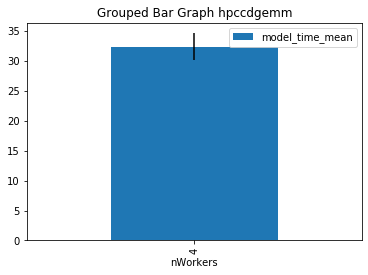

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_performance['benchmark'].unique():
    df_bench = df_performance[(df_performance['benchmark']==model_name)] # everybenchmark
    print(df_bench)
    # plot grouped bar chart
    df_bench.plot(x='nWorkers',
                  y='model_time_mean',
                  yerr='model_time_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

#  time slot

In [12]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks', 'nNodes','nWorkers']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nWorkers in df_bench.nWorkers.unique():
            df_senario = df_bench[df_bench.nWorkers == nWorkers]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_mean' : mean(x['init']),
                  'init_std' : std(x['init']),
                'run_mean' : mean(x['run']),
                  'run_std' : std(x['run']),
                'final_mean' : mean(x['final']),
                  'final_std' : std(x['final']),
                'duration_mean' : mean(x['duration']),
                  'duration_std' : std(x['duration']),
              })).reset_index()
            df_time.append(df_senario)

In [13]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,nNodes,nWorkers,init_mean,init_std,run_mean,run_std,final_mean,final_std,duration_mean,duration_std
0,hpccdgemm,16,4,4,0 days 00:00:05.400000,0 days 00:00:00.800000,0 days 00:03:30.900000,0 days 00:00:07.764663547,0 days 00:00:00.300000,0 days 00:00:00.458257569,0 days 00:04:15.218046405,0 days 00:00:06.942638771


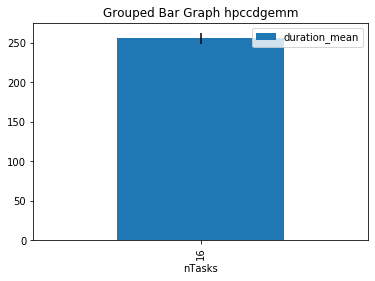

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_mean'] = df_bench['duration_mean'].dt.total_seconds()
    df_bench['duration_std'] = df_bench['duration_std'].dt.total_seconds()

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_mean',
                  yerr='duration_std',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

In [15]:
from numpy import percentile, mean, std

l_gb = ['benchmark', 'nTasks']

df_time = []

for model_name in df['benchmark'].unique():
       df_bench = df[(df['benchmark']==model_name)] # everybenchmark
       for nTasks in df_bench.nTasks.unique():
            df_senario = df_bench[df_bench.nTasks == nTasks]
            df_senario = df_senario.groupby(l_gb, sort=False).apply(lambda x: pd.Series({
                  'init_sum' : sum(x['init'].dt.total_seconds()),
                'run_sum' : sum(x['run'].dt.total_seconds()),
                'final_sum' : sum(x['final'].dt.total_seconds()),
                'duration_sum' : sum(x['duration'].dt.total_seconds()),
              })).reset_index()
            df_time.append(df_senario)

In [16]:
df_time = pd.concat(df_time, axis=0)
df_time

,benchmark,nTasks,init_sum,run_sum,final_sum,duration_sum
0,hpccdgemm,16,54.0,2109.0,3.0,2552.180464


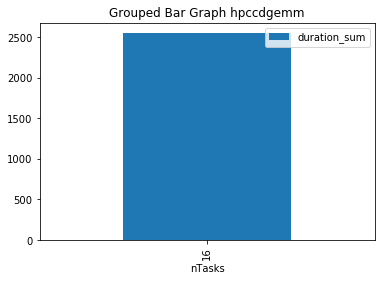

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

for model_name in df_time['benchmark'].unique():
    df_bench = df_time[(df_time['benchmark']==model_name)] # everybenchmark
    df_bench['duration_sum'] = df_bench['duration_sum']

    # plot grouped bar chart
    df_bench.plot(x='nTasks',
                  y='duration_sum',
                    kind='bar',
                    stacked=False,
                    title=f"Grouped Bar Graph {model_name}")

# Graph

In [18]:
df

,benchmark,times,nTasks,nNodes,nWorkers,Pending,Running,Completing,Completed,duration,performance,init,run,final,start,afterstart
0,hpccdgemm,0,16,4,4,2022-03-30 12:43:54+00:00,2022-03-30 12:44:00+00:00,2022-03-30 12:47:31+00:00,2022-03-30 12:47:32+00:00,0 days 00:04:12.152786469,32.8329,0 days 00:00:06,0 days 00:03:31,0 days 00:00:01,2022-03-30 12:43:54+00:00,0 days 00:00:00
1,hpccdgemm,1,16,4,4,2022-03-30 12:44:54+00:00,2022-03-30 12:45:00+00:00,2022-03-30 12:48:30+00:00,2022-03-30 12:48:30+00:00,0 days 00:04:08.900490008,29.7737,0 days 00:00:06,0 days 00:03:30,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:01:00
2,hpccdgemm,2,16,4,4,2022-03-30 12:45:54+00:00,2022-03-30 12:45:59+00:00,2022-03-30 12:49:34+00:00,2022-03-30 12:49:34+00:00,0 days 00:04:22.147506835,31.8622,0 days 00:00:05,0 days 00:03:35,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:02:00
3,hpccdgemm,3,16,4,4,2022-03-30 12:46:54+00:00,2022-03-30 12:47:00+00:00,2022-03-30 12:50:37+00:00,2022-03-30 12:50:37+00:00,0 days 00:04:22.148127306,31.2756,0 days 00:00:06,0 days 00:03:37,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:03:00
4,hpccdgemm,4,16,4,4,2022-03-30 12:47:55+00:00,2022-03-30 12:48:00+00:00,2022-03-30 12:51:25+00:00,2022-03-30 12:51:25+00:00,0 days 00:04:11.142247147,36.6319,0 days 00:00:05,0 days 00:03:25,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:04:01
5,hpccdgemm,5,16,4,4,2022-03-30 12:48:55+00:00,2022-03-30 12:48:59+00:00,2022-03-30 12:52:37+00:00,2022-03-30 12:52:37+00:00,0 days 00:04:21.147015356,31.2375,0 days 00:00:04,0 days 00:03:38,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:05:01
6,hpccdgemm,6,16,4,4,2022-03-30 12:49:55+00:00,2022-03-30 12:50:00+00:00,2022-03-30 12:53:36+00:00,2022-03-30 12:53:37+00:00,0 days 00:04:21.111586633,31.0654,0 days 00:00:05,0 days 00:03:36,0 days 00:00:01,2022-03-30 12:43:54+00:00,0 days 00:06:01
7,hpccdgemm,7,16,4,4,2022-03-30 12:50:55+00:00,2022-03-30 12:51:00+00:00,2022-03-30 12:54:37+00:00,2022-03-30 12:54:38+00:00,0 days 00:04:21.146476050,30.6373,0 days 00:00:05,0 days 00:03:37,0 days 00:00:01,2022-03-30 12:43:54+00:00,0 days 00:07:01
8,hpccdgemm,8,16,4,4,2022-03-30 12:51:55+00:00,2022-03-30 12:52:00+00:00,2022-03-30 12:55:29+00:00,2022-03-30 12:55:29+00:00,0 days 00:04:11.155174581,31.6121,0 days 00:00:05,0 days 00:03:29,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:08:01
9,hpccdgemm,9,16,4,4,2022-03-30 12:52:55+00:00,2022-03-30 12:53:02+00:00,2022-03-30 12:56:13+00:00,2022-03-30 12:56:13+00:00,0 days 00:04:01.129053667,36.5940,0 days 00:00:07,0 days 00:03:11,0 days 00:00:00,2022-03-30 12:43:54+00:00,0 days 00:09:01


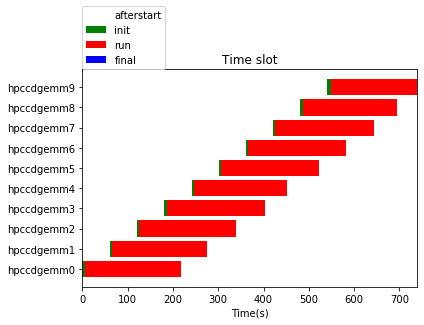

In [19]:
import numpy as np
import matplotlib.pyplot as plt

color=['white','green','red','blue']

y1 = df['afterstart'].dt.total_seconds()
y2 = df['init'].dt.total_seconds()
y3 = df['run'].dt.total_seconds()
y4 = df['final'].dt.total_seconds()

labels = df['benchmark']+df['times'].map(str)

plt.barh(labels, y1, color='white', label='afterstart')
plt.barh(labels, y2, left=y1, color='green', label='init')
plt.barh(labels, y3, left=y1+y2, color='red', label='run')
plt.barh(labels, y4, left=y1+y2+y3, color='blue', label='final')

plt.title("Time slot")                                                        #图片标题
plt.xlabel("Time(s)")                                                              #x轴标题
plt.legend(loc=[0, 1])                                                             #图例的显示位置设置
# plt.savefig("Error Analysis.png", bbox_inches='tight')          #保存图片命令一定要放在plt.show()前面
plt.show()
